Importing libraries

In [1]:
from faker import Faker
import pandas as pd
import random

Defining categories and payment type

In [2]:
categories = ['Food', 'Transportation', 'Bills', 'Groceries', 'Entertainment', 'Gifts', 'Subscriptions']
payment_modes = ['Cash', 'Credit Card', 'Debit Card', 'UPI', 'Wallet']

Generating data from facker

In [ ]:
fake = Faker()
data=[]
def generate_data(month,year):
    for _ in range(150):  # Generate 100 transactions per month
       date = fake.date_between_dates(
           date_start=pd.Timestamp(f'{year}-{month:02d}-01'),
           date_end=pd.Timestamp(f'{year}-{month:02d}-28')
       )
       category = random.choice(categories)
       payment_mode = random.choice(payment_modes)
       description = fake.text(max_nb_chars=20)
       amount = round(random.uniform(100, 5000), 2)
       cashback = round(amount * random.uniform(0, 0.1), 2) if random.random() > 0.8 else 0
       data.append([date, category, payment_mode, description, amount, cashback])
    return pd.DataFrame(data, columns=['Date', 'Category', 'Payment Mode', 'Description', 'Amount Paid', 'Cashback'])

In [10]:
print(generate_data(1,2024))

           Date        Category Payment Mode          Description  \
0    2024-01-24           Bills         Cash  Magazine wall role.   
1    2024-01-19            Food       Wallet       Whether first.   
2    2024-01-08   Subscriptions         Cash  Ok result everyone.   
3    2024-01-06           Gifts   Debit Card    Well decade fish.   
4    2024-01-24           Gifts  Credit Card   Hold finish speak.   
..          ...             ...          ...                  ...   
195  2024-01-02           Gifts   Debit Card      Discussion pay.   
196  2024-01-01           Bills   Debit Card       Certainly car.   
197  2024-01-27   Subscriptions  Credit Card     Site democratic.   
198  2024-01-09  Transportation  Credit Card     Woman newspaper.   
199  2024-01-06           Gifts          UPI      Meeting matter.   

     Amount Paid  Cashback  
0        1738.31       0.0  
1        4377.10       0.0  
2        3159.54       0.0  
3        2312.49       0.0  
4        1021.79       0.0

Generating data for January to December

In [14]:
complete_data=[]
for month in range(1,13):
    df=generate_data(month, 2024)
    complete_data.append(df)
overall_data=pd.concat(complete_data)
    


In [17]:
overall_data

,Date,Category,Payment Mode,Description,Amount Paid,Cashback
0,2024-01-24,Bills,Cash,Magazine wall role.,1738.31,0.00
1,2024-01-19,Food,Wallet,Whether first.,4377.10,0.00
2,2024-01-08,Subscriptions,Cash,Ok result everyone.,3159.54,0.00
3,2024-01-06,Gifts,Debit Card,Well decade fish.,2312.49,0.00
4,2024-01-24,Gifts,Credit Card,Hold finish speak.,1021.79,0.00
...,...,...,...,...,...,...
2595,2024-12-19,Groceries,Credit Card,Stand color hotel.,2272.34,0.00
2596,2024-12-19,Entertainment,Wallet,Kid young court at.,4969.14,278.97
2597,2024-12-24,Groceries,Credit Card,Four culture.,3798.84,0.00
2598,2024-12-03,Bills,UPI,Start fine until.,1929.66,0.00


Exporting data to csv

In [16]:
overall_data.to_csv('OverallExpenses.csv', index=False)

Connecting to a database

In [4]:
import mysql.connector

# Connect to MySQL
conn = mysql.connector.connect(
    host="localhost",        
    user="root",             
    password="1379",  
)

# Create a cursor object
cursor = conn.cursor()

# If the database does not exist, create it
cursor.execute("CREATE DATABASE IF NOT EXISTS expense_tracker")
cursor.execute("USE expense_tracker")


Creating a table

In [5]:
# Create the "expenses_data" table
cursor.execute('''
CREATE TABLE IF NOT EXISTS expenses_data (
    id INT AUTO_INCREMENT PRIMARY KEY,
    date DATE,
    category VARCHAR(50),
    payment_mode VARCHAR(20),
    description VARCHAR(255),
    amount_paid DECIMAL(10, 2),
    cashback DECIMAL(10, 2)
)
''')


Loading data into the table

In [7]:
import pandas as pd

# Read the simulated CSV data
data = pd.read_csv("OverallExpenses.csv")

# Insert data into MySQL
for index, row in data.iterrows():
    sql = '''
    INSERT INTO expenses_data (date, category, payment_mode, description, amount_paid, cashback)
    VALUES (%s, %s, %s, %s, %s, %s)
    '''
    values = (
        row['Date'], row['Category'], row['Payment Mode'],
        row['Description'], row['Amount Paid'], row['Cashback']
    )
    cursor.execute(sql, values)

# Commit the changes
conn.commit()


Checking the existence of data

In [9]:
# Query to check the first 5 rows
cursor.execute("SELECT * FROM expenses_data LIMIT 5")
rows = cursor.fetchall()

# Print the results
for row in rows:
    print(row)


(1, datetime.date(2024, 1, 24), 'Bills', 'Cash', 'Magazine wall role.', Decimal('1738.31'), Decimal('0.00'))
(2, datetime.date(2024, 1, 19), 'Food', 'Wallet', 'Whether first.', Decimal('4377.10'), Decimal('0.00'))
(3, datetime.date(2024, 1, 8), 'Subscriptions', 'Cash', 'Ok result everyone.', Decimal('3159.54'), Decimal('0.00'))
(4, datetime.date(2024, 1, 6), 'Gifts', 'Debit Card', 'Well decade fish.', Decimal('2312.49'), Decimal('0.00'))
(5, datetime.date(2024, 1, 24), 'Gifts', 'Credit Card', 'Hold finish speak.', Decimal('1021.79'), Decimal('0.00'))


In [10]:
#Closing the connection
# Close the cursor and connection
cursor.close()
conn.close()


Importing data from csv

In [13]:
df = pd.read_csv('OverallExpenses.csv')

In [14]:
df

,Date,Category,Payment Mode,Description,Amount Paid,Cashback
0,2024-01-24,Bills,Cash,Magazine wall role.,1738.31,0.00
1,2024-01-19,Food,Wallet,Whether first.,4377.10,0.00
2,2024-01-08,Subscriptions,Cash,Ok result everyone.,3159.54,0.00
3,2024-01-06,Gifts,Debit Card,Well decade fish.,2312.49,0.00
4,2024-01-24,Gifts,Credit Card,Hold finish speak.,1021.79,0.00
...,...,...,...,...,...,...
24595,2024-12-19,Groceries,Credit Card,Stand color hotel.,2272.34,0.00
24596,2024-12-19,Entertainment,Wallet,Kid young court at.,4969.14,278.97
24597,2024-12-24,Groceries,Credit Card,Four culture.,3798.84,0.00
24598,2024-12-03,Bills,UPI,Start fine until.,1929.66,0.00


Visualizing the data

C:\Users\gokul\AppData\Local\Temp\ipykernel_23152\2909784187.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Amount Paid", y="Category", data=df, palette="viridis")


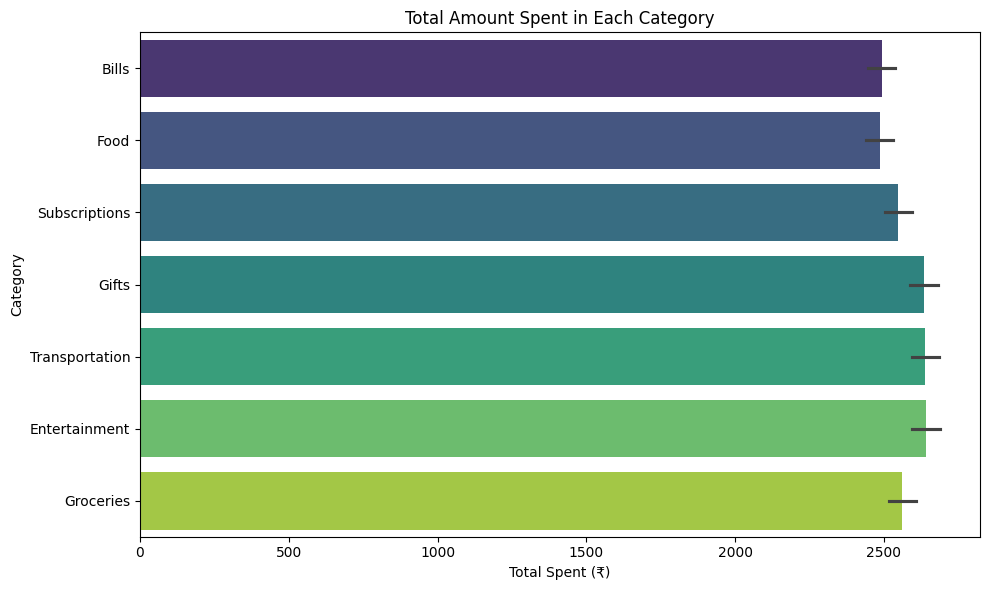

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the total amount spent by category
plt.figure(figsize=(10, 6))
sns.barplot(x="Amount Paid", y="Category", data=df, palette="viridis")
plt.title("Total Amount Spent in Each Category")
plt.xlabel("Total Spent (₹)")
plt.ylabel("Category")
plt.tight_layout()
plt.show()
